In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Data
The data is sourced from
[UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/42/glass+identification)

1. RI: refractive index
2. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
3. Mg: Magnesium
4. Al: Aluminum
5. Si: Silicon
6. K: Potassium
7. Ca: Calcium
8. Ba: Barium
9. Fe: Iron
10. Type of glass: (class attribute)
     - 1 building_windows_float_processed
     - 2 building_windows_non_float_processed
     - 3 vehicle_windows_float_processed
     - 4 vehicle_windows_non_float_processed (none in this database)
     - 5 containers
     - 6 tableware
     - 7 headlamps

In [2]:
file = "./glass.data"
column_names = ["Id_number", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type_of_glass"]
df = pd.read_csv(file, names=column_names)
df.set_index("Id_number", inplace=True)

print(df.shape)
df.head(15)

(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
Id_number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1


# Data exploration

In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


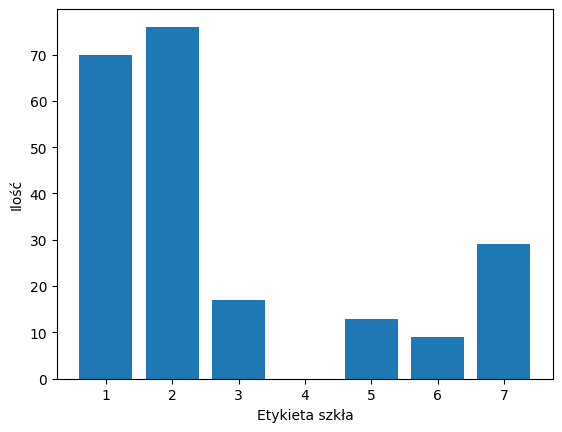

In [4]:
type_counts = df["Type_of_glass"].value_counts().sort_index()
plt.bar(x=type_counts.index, height=type_counts.values)
plt.xlabel("Etykieta szkła")
plt.ylabel("Ilość")
plt.show()

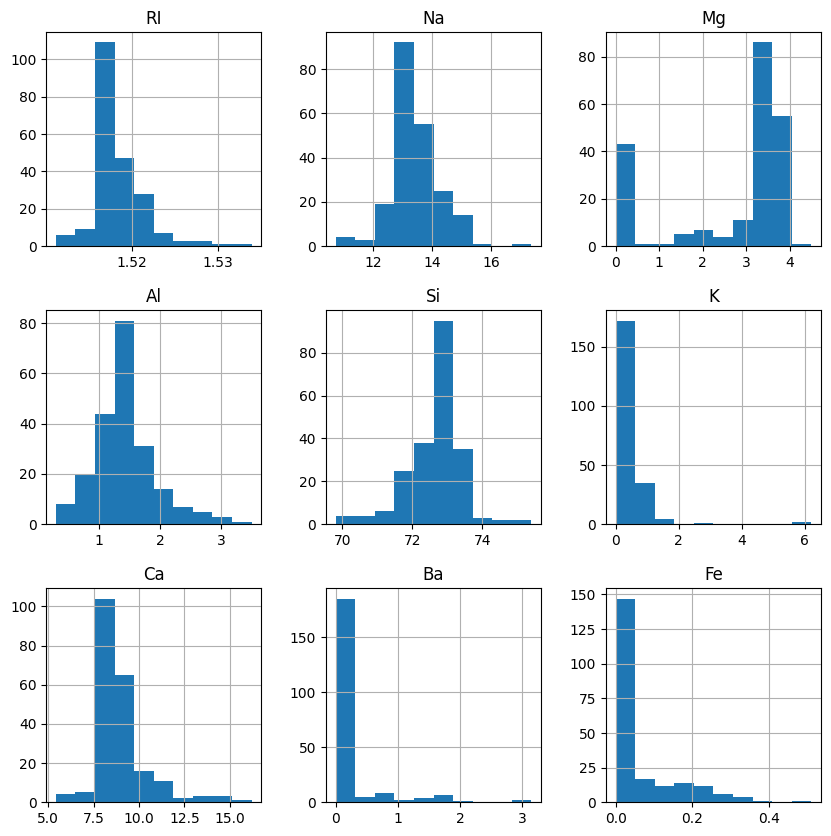

In [5]:
df.drop(["Type_of_glass"], axis=1).hist()
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

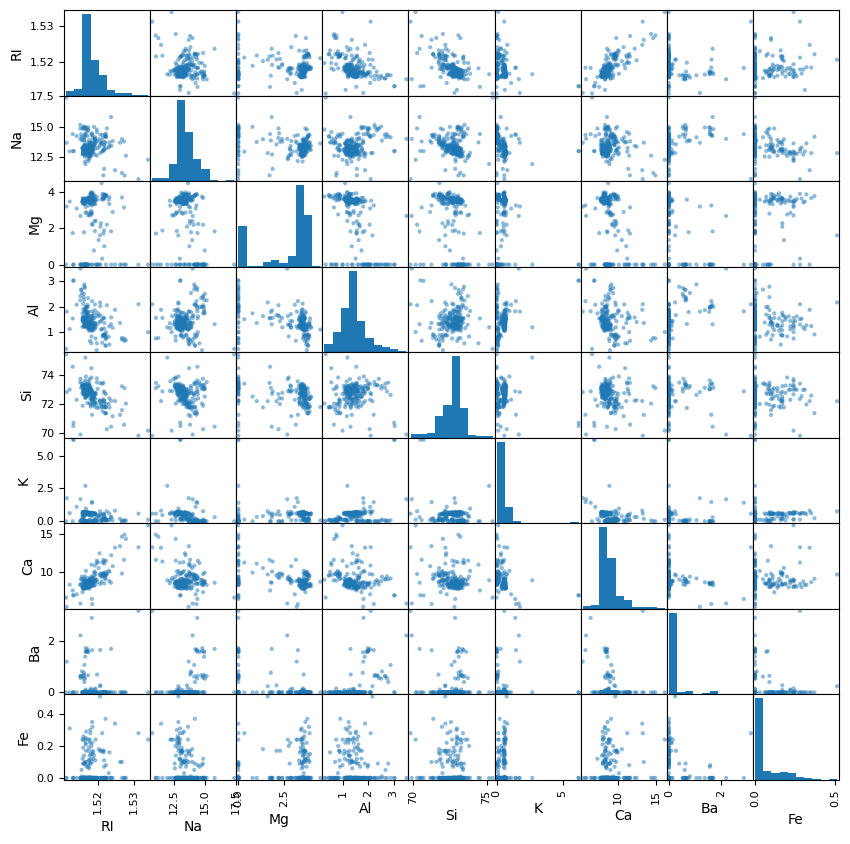

In [6]:
scatter_matrix(df.drop(["Type_of_glass"], axis=1))
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# Preprocessing

In [7]:
# Divide the data into classes and sets
classes = df["Type_of_glass"]
features = df.drop("Type_of_glass", axis=1)

print(classes)
print(features)

Id_number
1      1
2      1
3      1
4      1
5      1
      ..
210    7
211    7
212    7
213    7
214    7
Name: Type_of_glass, Length: 214, dtype: int64
                RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
Id_number                                                          
1          1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
2          1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
3          1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
4          1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
5          1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
...            ...    ...   ...   ...    ...   ...   ...   ...  ...
210        1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
211        1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
212        1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
213        1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
214        1.51711  14.23  0

In [8]:
# Normalize features using various methods
norm_features = Normalizer().fit_transform(features)
std_features = StandardScaler().fit_transform(features)

# PCA - reduce dimensions to two
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)
pca_features_pd = pd.DataFrame(data=pca_features, columns=["PC1", "PC2"])

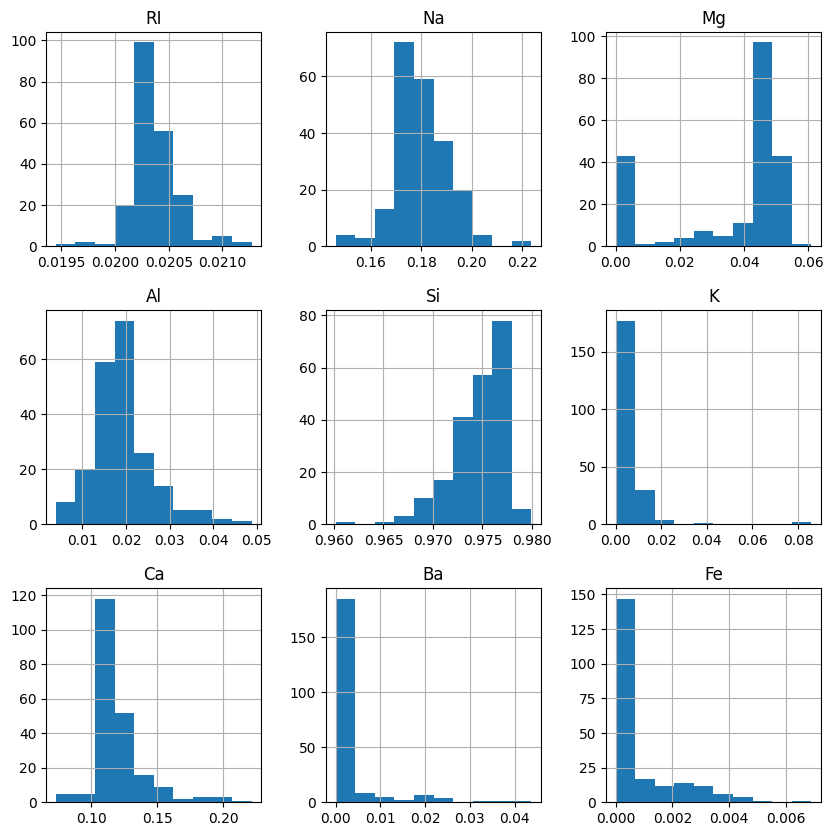

In [9]:
pd.DataFrame(data=norm_features, columns=features.columns).hist()
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

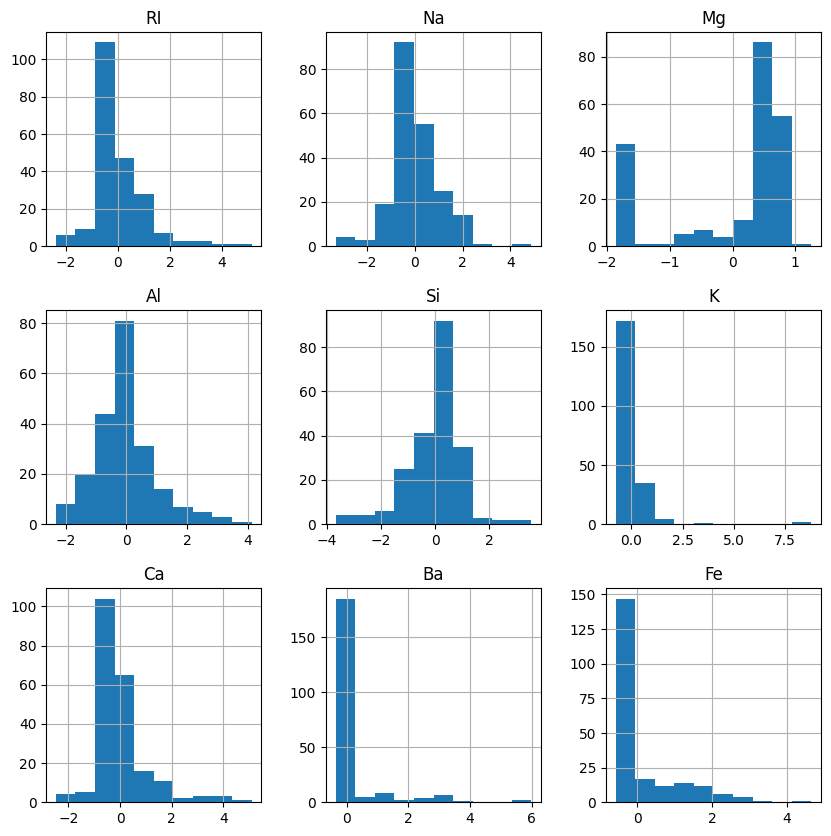

In [10]:
pd.DataFrame(data=std_features, columns=features.columns).hist()
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

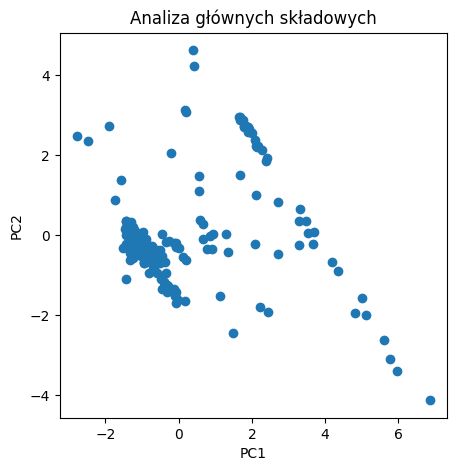

In [11]:
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.scatter(pca_features_pd["PC1"], pca_features_pd["PC2"])
plt.title("Analiza głównych składowych")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [12]:
# PCA 
pd.DataFrame(data=pca.components_, columns=features.columns)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.000928,0.017225,-0.723535,0.046335,-0.007694,-0.078404,0.679717,0.076358,0.000906
1,-0.001523,0.398798,-0.543051,0.258841,0.194092,0.103827,-0.616725,0.223545,-0.016784


/home/qriaa/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


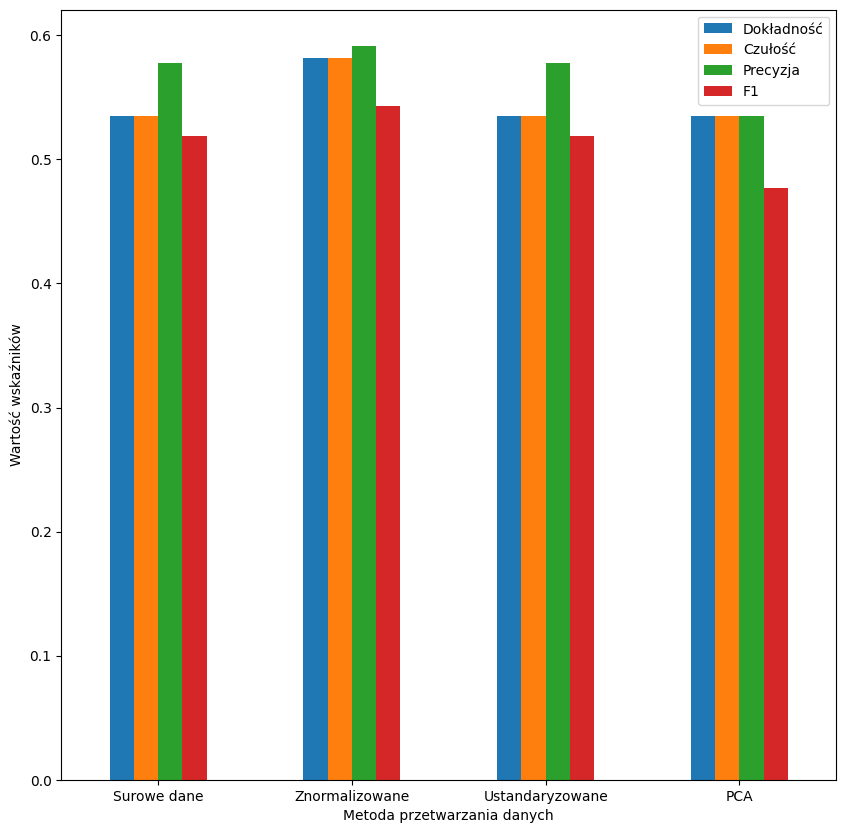

In [15]:
test_set_size = 0.20
seed = 1
def train_and_test_model(features, classes, test_size, seed, model):
    features_train, features_test, classes_train, classes_test = train_test_split(features, classes, test_size=test_size, random_state=seed, stratify=classes)
    model.fit(features_train, classes_train)
    classes_predictions = model.predict(features_test)

    accuracy = accuracy_score(classes_test, classes_predictions)
    recall = recall_score(classes_test, classes_predictions, average="weighted")
    precision = precision_score(classes_test, classes_predictions, average="weighted")
    f1 = f1_score(classes_test, classes_predictions, average="weighted")

    return (accuracy, recall, precision, f1)


raw_acc, raw_recall, raw_prec, raw_f1 = train_and_test_model(features, classes, test_set_size, seed, GaussianNB())
norm_acc, norm_recall, norm_prec, norm_f1 = train_and_test_model(norm_features, classes, test_set_size, seed, GaussianNB())
std_acc, std_recall, std_prec, std_f1 = train_and_test_model(std_features, classes, test_set_size, seed, GaussianNB())
pca_acc, pca_recall, pca_prec, pca_f1 = train_and_test_model(pca_features, classes, test_set_size, seed, GaussianNB())


results = pd.DataFrame(
    data={"Dokładność": [raw_acc, norm_acc, std_acc, pca_acc],
     "Czułość": [raw_recall, norm_recall, std_recall, pca_recall],
     "Precyzja": [raw_prec, norm_prec, std_prec, pca_acc],
     "F1": [raw_f1, norm_f1, std_f1, pca_f1]
     },
     index=["Surowe dane", "Znormalizowane", "Ustandaryzowane", "PCA"])

results.plot(kind="bar", figsize=(10,10))
plt.xlabel("Metoda przetwarzania danych")
plt.ylabel("Wartość wskaźników")
plt.xticks(rotation=0)
plt.show()